# ÏÑ†ÌòïÌöåÍ∑Ä ÏòàÏãú (2) - ÏùòÎ£åÎπÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜå
## 1. ÏûëÏóÖ Ï§ÄÎπÑ
### 1) Ìå®ÌÇ§ÏßÄ Î∞è Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
- ÎØ∏Íµ≠ ÌôòÏûêÏùò ÏùòÎ£åÎπÑÍ∞Ä Îì§Ïñ¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú `1,338Í∞úÏùò Í¥ÄÏ∏°Ïπò`Í∞Ä ÏûàÎã§.

| Î≥ÄÏàò | ÏùòÎØ∏ | Í∏∞ÌÉÄ |
|---|---|---|
| age | ÏàòÏùµÏûêÏùò Ïó∞Î†π | ÏàòÏπòÌòï |
| sex | Í≥ÑÏïΩÏûêÏùò ÏÑ±Î≥Ñ | Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(female/male) |
| bmi | ÎπÑÎßåÎèÑ. Î™∏Î¨¥Í≤åÎ•º ÌÇ§Ïùò Ï†úÍ≥±ÏúºÎ°ú ÎÇòÎàà Í∞í. | ÏàòÏπòÌòï<br/>Ï†ïÏÉÅÎ≤îÏúÑ: 18.5~24.9 |
| children | ÏùòÎ£åÎ≥¥ÌóòÏù¥ Ï†ÅÏö©ÎêòÎäî ÏûêÎÖÄ Ïàò | ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ |
| smoker | Ìù°Ïó∞ Ïó¨Î∂Ä | Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(yes/no) |
| region | Í±∞Ï£ºÏßÄÏó≠ | Î≤îÏ£ºÌòï<br/>(Î∂ÅÎèô: northeast, ÎÇ®Îèô: southeast / ÎÇ®ÏÑú: southwest / Î∂ÅÏÑú: northwest) |
| charges | ÏùòÎ£åÎπÑ | ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ |

In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, melt, merge, get_dummies
from pca import pca
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats

In [2]:
origin = read_excel('https://data.hossam.kr/E04/insurance.xlsx')
origin

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
### 1) Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨ ÌõÑ Í≤∞Ï∏°ÏπòÏôÄ Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ ÌôïÏù∏

In [4]:
edf = origin.copy()
edf.isna().sum()    # Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏
edf.dtypes          # Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 2) Î≤îÏ£ºÌòï ÌÉÄÏûÖ Î≥ÄÌôò
- Î≤îÏ£ºÌòï ÌïÑÎìú Ïù¥Î¶Ñ

In [4]:
cnames = ['sex', 'smoker', 'region']
cnames

['sex', 'smoker', 'region']

- Î≤îÏ£ºÌòï Ïª¨Îüº ÌÉÄÏûÖ Î≥ÄÌôò

In [5]:
edf2 = helper.setCategory(edf, fields=cnames, labelling=False)
edf2.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## 3. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
### 1) ÏàòÏπòÌòï Î≥ÄÏàò
#### 1. Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
- ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÄ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌÜµÍ≥ÑÍ∞íÏùÑ ÌååÏïÖÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§

In [7]:
desc = edf2.describe()
desc

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

> Ï§ëÏïôÍ∞í(50%)Í≥º ÌèâÍ∑†(mean)Ïù¥ Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Î©¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ìïú Ï™ΩÏúºÎ°ú Ïè†Î†§ÏûàÎã§Îäî ÎúªÏù¥Îã§
>
> Ïòà) chargers (50% = 9382.033000) vs. (mean = 13270.422265)
>
> ÏùòÎ£åÎπÑÏßÄÏ∂ú Î≥ÄÏàòÏùò ÌÜµÍ≥ÑÍ∞íÏùÑ ÏÇ¥Ìé¥Î≥¥Î©¥ Ï§ëÏïôÍ∞íÏù¥ `$9,382`Ïù¥Í≥†, ÌèâÍ∑†Ïù¥ `$13,270`Ïù∏ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ïó¨Í∏∞ÏÑú Ìï¥Îãπ Î≥ÄÏàòÏùò ÌèâÍ∑†Í∞íÏù¥ Ï§ëÏïôÍ∞íÎ≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê ÏùòÎ£åÎπÑ Î∂ÑÌè¨Îäî Ïò§Î•∏Ï™ΩÏúºÎ°ú Íº¨Î¶¨Í∞Ä Í∏¥ Î∂ÑÌè¨Î•º ÏßÄÎãê Í≤ÉÏù¥Îã§.

#### 2. Ï†ÑÏ≤¥ ÏÉÅÏûê Í∑∏Î¶º ÌôïÏù∏

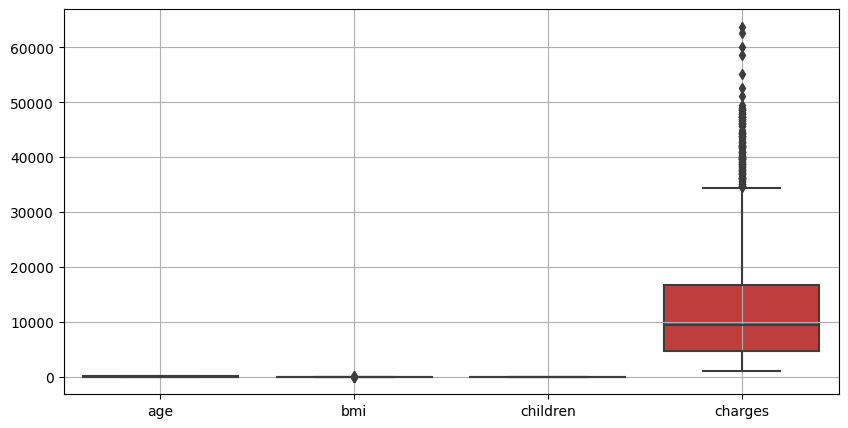

In [9]:
plt.figure(figsize = (10, 5))
sb.boxplot(data=edf)
plt.grid()
plt.show()
plt.close()

#### 3. Í∞úÎ≥Ñ ÏÉÅÏûêÍ∑∏Î¶º ÌôïÏù∏

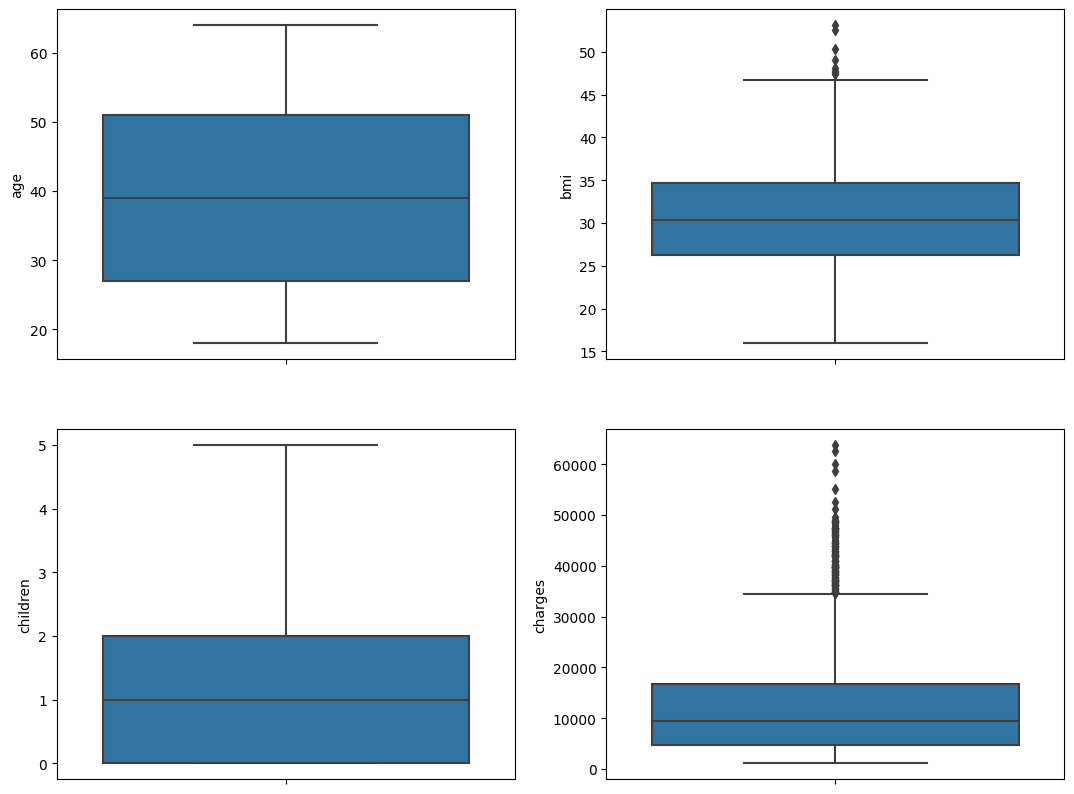

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
rows = len(ax)
cols = len(ax[0])
for i in range(0, rows):
    for j in range(0, cols):
        idx = i * cols + j
        fieldName = desc.columns[idx]
        field = edf2[fieldName]
        sb.boxplot(edf, y=field, ax=ax[i][j])
        if idx+1 == len(desc.columns):
            break
plt.show()
plt.close()

- Ïù¥ÏÉÅÏπòÎäî Î¨¥Ï°∞Í±¥ Ï†ïÏ†úÌïòÎäî Í≤É ÏïÑÎãò (Ïòà - ÎπÑÎßåÏπòÏùò Ïù¥ÏÉÅÏπòÎì§ÏùÄ Í≥ºÏ≤¥Ï§ëÏù∏ ÏÇ¨ÎûåÎì§ÏûÑ)
- -> Î∂ÑÏÑùÍ∞ÄÍ∞Ä Ï±ÖÏûÑÏßÄÍ≥† Ïù¥ÏÉÅÏπòÎì§Ïù¥ Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ(Ïù¥ÏÉÅÏπòÏó¨ÏÑú Ï†ïÏ†úÌï† Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ, ÏïÑÎãàÎ©¥ Ïù¥ÏÉÅÏπòÍ∞Ä ÏïÑÎãå Í∞ÄÏπò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïó¨ÏÑú ÎÉÖÎëò Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ) Í≤∞Ï†ïÌï¥Ïïº Îê®
#### 4. ÌûàÏä§ÌÜ†Í∑∏Îû® ÌôïÏù∏

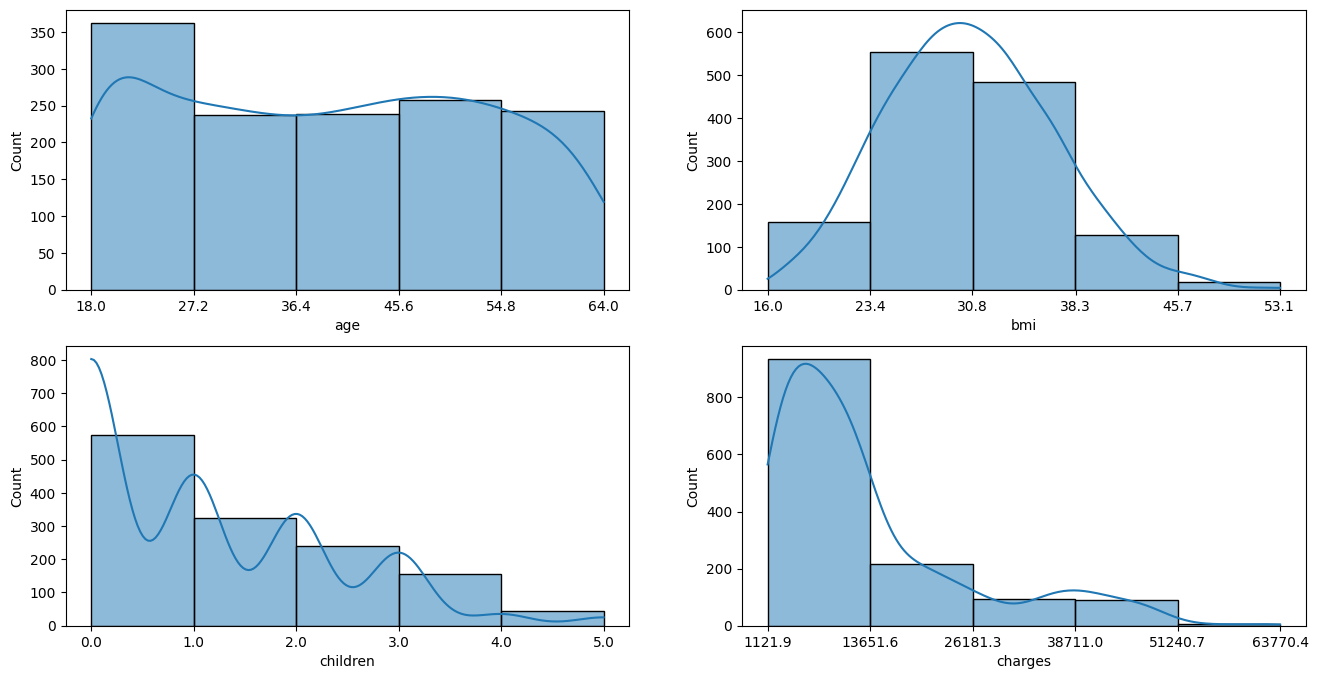

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
rows = len(ax)
cols = len(ax[0])
for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        fieldName = desc.columns[idx]
        field = edf[fieldName]
        hist, bins = np.histogram(field, bins = 5)
        bins2 = np.round(bins, 1)
        sb.histplot(data = edf2, x=fieldName, bins=5,
                    kde=True, ax=ax[i][j])
        ax[i][j].set_xticks(bins2)
        ax[i][j].set_xticklabels(bins2)
        if idx+1 == len(desc.columns):
            break
plt.show()
plt.close()

> ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÇ¨ÎûåÎì§ÏùÄ Ïó∞Í∞Ñ `$15,000 Ïù¥ÌïòÏùò ÏùòÎ£åÎπÑ ÏßÄÏ∂ú`Ïóê Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.
>
> ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú `bmiÏßÄÏàò`Î•º ÏÇ¥Ìé¥Î≥¥Î©¥ `Í≥ºÏ≤¥Ï§ëÏù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†àÎ∞ò Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄ`ÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§ (Ï†ïÏÉÅÎ≤îÏúÑ: 18.5~24.9)

#### 5. Í∞Å Î≥ÄÏàò Í∞ÑÏùò Í¥ÄÍ≥Ñ ÌååÏïÖ
- ÏàòÏπòÌòï Î≥ÄÏàòÎìúÏùò Ïù¥Î¶Ñ

In [20]:
nnames = list(desc.columns)
nnames
ndf = edf.filter(nnames)
ndf

age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]

- ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨

<Figure size 2000x2000 with 0 Axes>

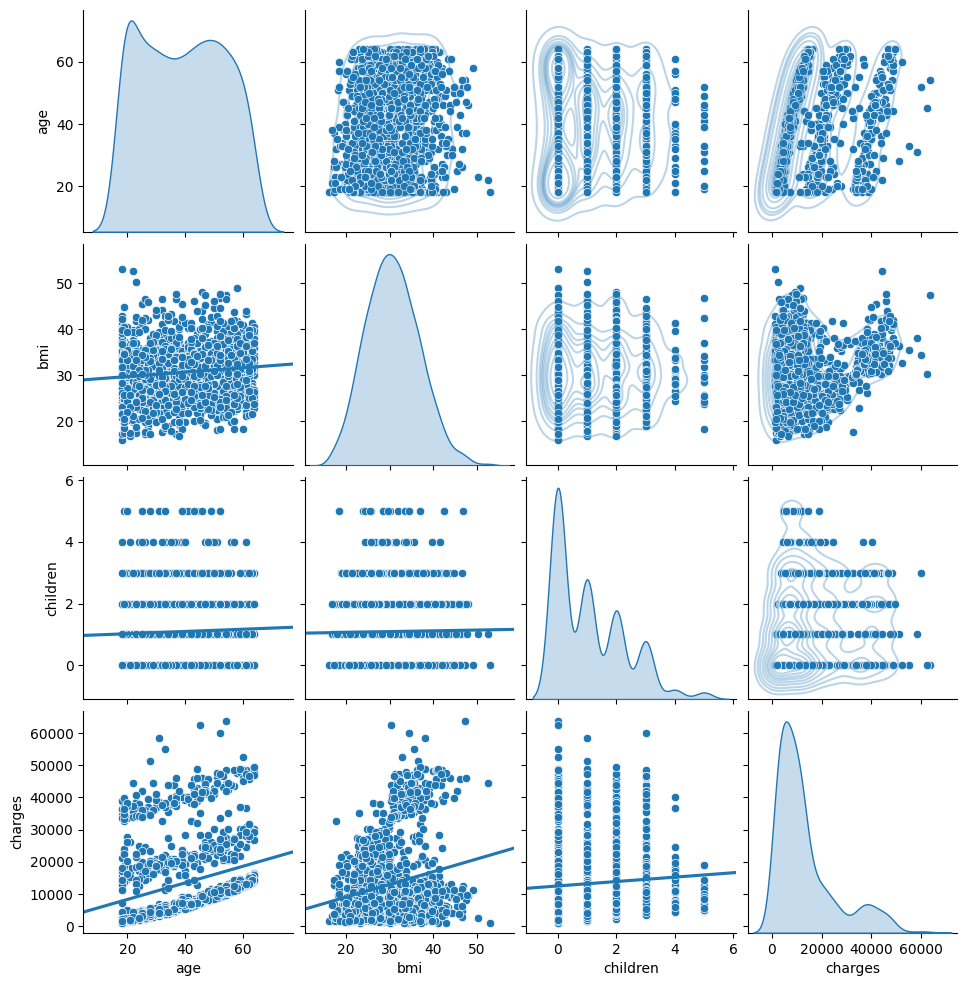

In [21]:
plt.figure(figsize=(20, 20))
g = sb.pairplot(ndf, diag_kind='kde')
g.map_upper(sb.kdeplot, alpha=0.3)
g.map_lower(sb.regplot, scatter=False, truncate=False, ci=False)
plt.show()
plt.close()

> Ïù¥ Í∑∏Î¶ºÏóêÏÑú Ïñ¥Îñ§ Ìå®ÌÑ¥Ïù¥ ÎààÏóê ÎùÑÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥Î©¥ ÌäπÏ†ïÌïú Í¥ÄÍ≥ÑÎ•º Ï∞æÍ∏∞Îäî Ïñ¥Î†§ÏõåÎ≥¥ÏûÑ
> 
> Ïó¨Í∏∞ Ïó∞Î†πÍ≥º ÏùòÎ£åÎπÑÏßÄÏ∂úÏùò ÏÇ∞Ìè¨ÎèÑÎ•º ÏÇ¥Ìé¥Î≥¥Îãà, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏßÅÏÑ† ÌòïÌÉúÎ°ú Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùåÏùÑ Î≥º Ïàò ÏûàÎã§.
>
> Îòê, bmiÏßÄÏàòÏôÄ ÏùòÎ£åÎπÑÏßÄÏ∂úÏùÄ ÌÅ¨Í≤å Îëê Í∞úÏùò Íµ∞Ïßë(cluster)Î°ú ÎÇòÎâòÏñ¥Ï†∏ ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
>
> Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥ÏßÄÎäî ÏïäÏßÄÎßå age-bmi, age-charges, children-chargesÍ∞Ä ÏïΩÌïúÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.
>
>ÎÇòÏù¥Í∞Ä Îì§ÏàòÎ°ù Î™∏Î¨¥Í≤åÍ∞Ä Ï¶ùÍ∞ÄÌïòÍ≥†, bmi ÏàòÏπòÍ∞Ä ÎÜíÍ±∞ÎÇò Î∂ÄÏñëÍ∞ÄÏ°± ÏàòÍ∞Ä ÎßéÏïÑÏßà ÏàòÎ°ù ÏùòÎ£åÎπÑÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÄ Ïñ¥ÎäêÏ†ïÎèÑ Ìï©Î¶¨Ï†ÅÏù∏ Í≤∞Í≥ºÎùº Ìï† Ïàò ÏûàÍ≤†Îã§.

- ÏÉÅÍ¥ÄÌñâÎ†¨
    - ÎåÄÍ∞ÅÏÑ†ÏùÄ Î≥ÄÏàò ÏûêÏã†Ïù¥Í∏∞Ïóê Ìï≠ÏÉÅ '1'Ïù¥ ÌëúÍ∏∞Îê®
    - ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≥ÄÏàòÍ∞Ä Í∞ôÏùÄ Î∞©Ìñ•ÏúºÎ°ú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÍ≥†, -1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î∞òÎåÄ Î∞©Ìñ•ÏúºÎ°ú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÑ

In [22]:
corr = ndf.corr(method='pearson')
corr

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

> Ïó∞Î†π, bmiÏßÄÏàò, Î∂ÄÏñëÍ∞ÄÏ°± Ïàò, ÏùòÎ£åÎπÑÏßÄÏ∂úÏùÄ ÏïΩÌïòÏßÄÎßå `Î™®Îëê Ïñë(+)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ`Î•º Î≥¥Ïù¥Í≥† ÏûàÎã§.
> 
> Ïòà) Ïó∞Î†πÍ≥º bmiÏßÄÏàòÎäî ÎÇòÏù¥Í∞Ä Îì§Ïñ¥Í∞à ÏàòÎ°ù Î™∏Î¨¥Í≤åÍ∞Ä Ï¶ùÍ∞ÄÎêòÎ©¥ÏÑú bmi ÏßÄÏàòÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•ÏùÑ ÏÑ§Î™ÖÌï† Ïàò ÏûàÍ≥†, Î∂ÄÏñëÍ∞ÄÏ°± ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏù¥ ÎßéÏïÑÏßÑÎã§Í≥† Î≥¥Îäî Í≤ÉÎèÑ Ìï©Î¶¨Ï†ÅÏù∏ ÌåêÎã®Ïù¥ Îê† Ïàò ÏûàÎã§.

### 6) PCA Î∂ÑÏÑù
- ÌöåÍ∑Ä Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú ÏöîÏù∏Îì§ÏùÑ ÏÑ†Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌïúÎã§
#### Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
- Î≤îÏ£ºÌòïÏùÄ PCAÎ•º ÏàòÌñâÌï† Ïàò ÏóÜÍ∏∞Ïóê ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂úÌï¥ Îëî `ndf`Î•º ÏÇ¨Ïö©
- Ï¢ÖÏÜç Î≥ÄÏàòÏù∏ ÏùòÎ£åÎπÑ ÌïÑÎìúÎäî Ï†úÏô∏ÌïòÍ≥† ÏßÑÌñâ

In [31]:
x_train_std_df, y_train_std_df = helper.scalling(ndf[nnames], 'charges')
x_train_std_df

age       bmi  children
0    -1.438764 -0.453320 -0.908614
1    -1.509965  0.509621 -0.078767
2    -0.797954  0.383307  1.580926
3    -0.441948 -1.305531 -0.908614
4    -0.513149 -0.292556 -0.908614
...        ...       ...       ...
1333  0.768473  0.050297  1.580926
1334 -1.509965  0.206139 -0.908614
1335 -1.509965  1.014878 -0.908614
1336 -1.296362 -0.797813 -0.908614
1337  1.551686 -0.261388 -0.908614

[1338 rows x 3 columns]

#### PCA

In [32]:
model = pca()
# ÌëúÏ§ÄÌôî Í≤∞Í≥ºÎ•º ÌôúÏö©ÌïòÏó¨ Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù ÏàòÌñâ
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']

best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
print(best_names)

topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
['children', 'age']


PC   feature   loading  type
0  PC1       age  0.692028  best
1  PC2  children  0.931148  best
2  PC3       age -0.717326  best
3  PC3       bmi  0.669385  weak


### 2) Î≤îÏ£ºÌòï Î≥ÄÏàò
#### 1. Ï¢ÖÎ•òÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ ÌôïÏù∏

In [33]:
for name in cnames:
    print(edf2[name].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


#### 2. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Îç∞Ïù¥ÌÑ∞Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî

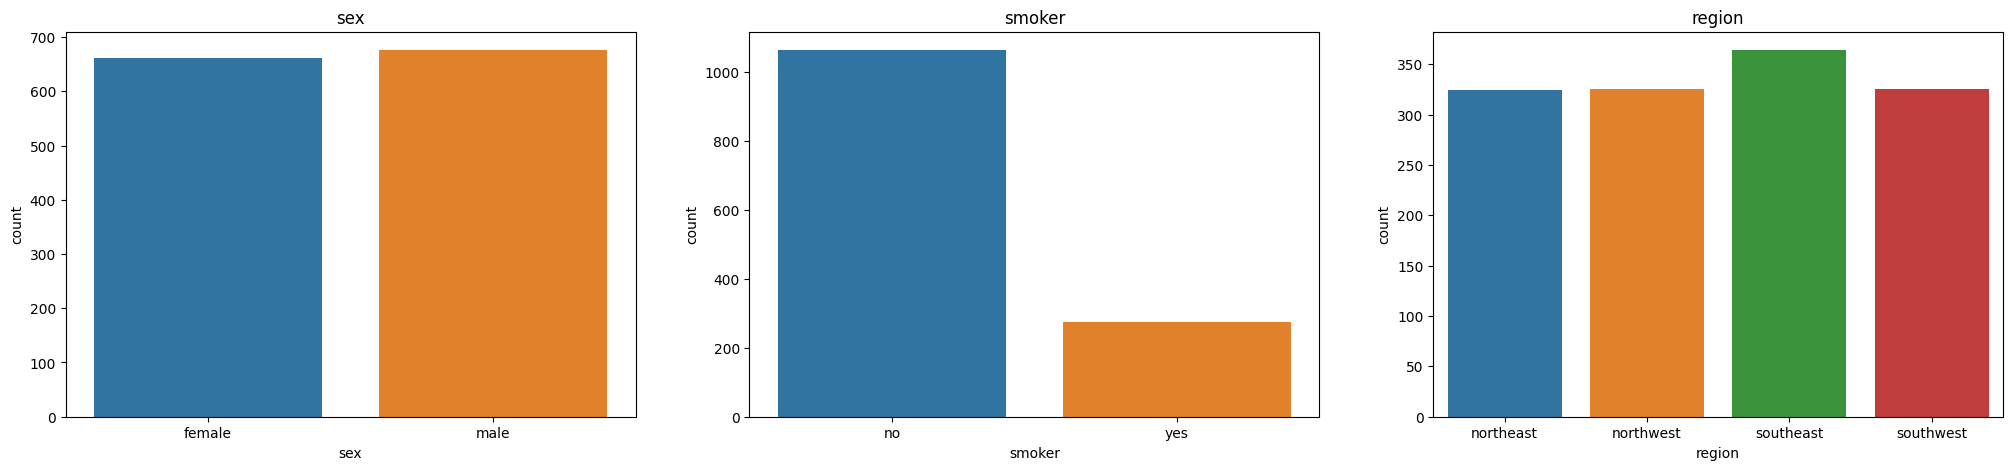

In [34]:
fig, ax = plt.subplots(1, len(cnames), figsize=(25, 5))

for i, v in enumerate(cnames):
    vc = DataFrame(edf2[v].value_counts(), columns=['count'])
    #print(vc)
    sb.barplot(data=vc, x=vc.index, y='count', ax=ax[i])
    ax[i].set_title(v)
    
plt.show()
plt.close()

> Ìù°Ïó∞ Ïó¨Î∂ÄÏùò Í≤ΩÏö∞ ÎπÑÌù°Ïó∞ÏûêÍ∞Ä ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎã§.
> 
> Í∑∏ Î∞ñÏóê ÏÑ±Î≥ÑÍ≥º ÏßÄÏó≠Ïùò Í≤ΩÏö∞ ÎπÑÏä∑ÌïòÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê `Î∂ÑÏÇ∞Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌÜµÏ†úÏöîÏù∏ÏúºÎ°ú ÎÑ£Îäî Í≤É`ÏùÑ Í≥†Î†§Ìï¥ Î≥º Ïàò ÏûàÍ≤†Îã§.

#### 3. Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê Îî∞Îùº ÌèâÍ∑†Ïù¥ Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÏßÄ ÌôïÏù∏
- ÎùºÎ≤®ÎßÅÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±

In [35]:
ldf = helper.setCategory(edf, fields=cnames, labelling=True)
print(ldf.dtypes)

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


- Î∂ÑÏÇ∞Î∂ÑÏÑù

In [36]:
lm = ols('charges ~ C(sex)+C(smoker)+C(region)+C(sex):C(smoker)+C(smoker):C(region)+C(region):C(sex)+C(sex):C(smoker):C(region)', data=ldf).fit()
lmdf = anova_lm(lm)
lmdf['Í≤∞Í≥º'] = lmdf['PR(>F)'] < 0.05
print(lmdf)

                                df        sum_sq       mean_sq            F  \
C(sex)                         1.0  6.435902e+08  6.435902e+08    11.730026   
C(smoker)                      1.0  1.208777e+11  1.208777e+11  2203.108485   
C(region)                      3.0  1.078004e+08  3.593345e+07     0.654920   
C(sex):C(smoker)               1.0  4.904163e+08  4.904163e+08     8.938290   
C(smoker):C(region)            3.0  1.344084e+09  4.480281e+08     8.165726   
C(region):C(sex)               3.0  1.382281e+06  4.607604e+05     0.008398   
C(sex):C(smoker):C(region)     3.0  7.517058e+07  2.505686e+07     0.456684   
Residual                    1322.0  7.253404e+10  5.486690e+07          NaN   

                                   PR(>F)     Í≤∞Í≥º  
C(sex)                       6.338371e-04   True  
C(smoker)                   7.872124e-284   True  
C(region)                    5.799028e-01  False  
C(sex):C(smoker)             2.844155e-03   True  
C(smoker):C(region)          

> ÏÑ±Î≥ÑÍ≥º Ìù°Ïó∞ Ïó¨Î∂ÄÏóê ÎåÄÌïú pÍ∞íÏù¥ Î™®Îëê 0.05 ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Îëê ÏöîÏù∏ÏùÄ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
>
> `ÏÑ±Î≥ÑÍ≥º Ìù°Ïó∞Îüâ`, `Ìù°Ïó∞ÎüâÍ≥º ÏßÄÏó≠` Í∞ÑÏóêÎäî `ÍµêÌö®ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏûàÏùå`Ïù¥ Î∞úÍ≤¨ÎêòÏóàÎã§.

- ÍµêÌò∏ÏûëÏö©ÏùÑ Î≥¥Ïù¥Îäî Î≥ÄÏàòÍ∞ÑÏùò ÎπÑÍµê

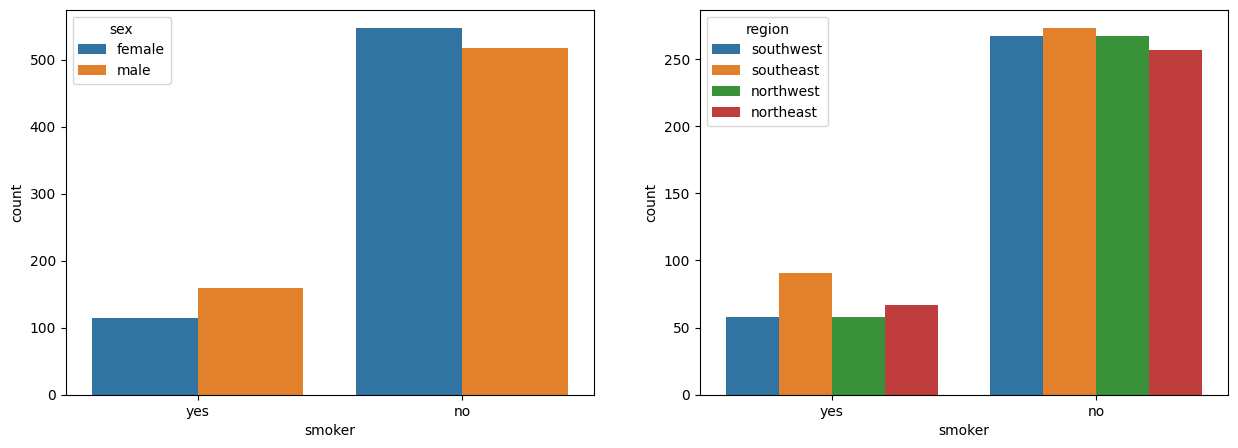

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sb.countplot(data=edf, x='smoker', hue='sex', ax=ax1)    
sb.countplot(data=edf, x='smoker', hue='region', ax=ax2)

plt.show()
plt.close()

## 4. ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†Ï†ïÎêú ÏöîÏù∏

| Íµ¨Î∂Ñ | Î≥ÄÏàò | ÏùòÎØ∏ | Í∏∞ÌÉÄ |
|---|---|---|---|
| Ï¢ÖÏÜçÎ≥ÄÏàò | charges | ÏùòÎ£åÎπÑ | ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ |
| ÎèÖÎ¶ΩÎ≥ÄÏàò | age | ÏàòÏùµÏûêÏùò Ïó∞Î†π | ÏàòÏπòÌòï |
| ÎèÖÎ¶ΩÎ≥ÄÏàò | bmi(?) | ÎπÑÎßåÎèÑ. Î™∏Î¨¥Í≤åÎ•º ÌÇ§Ïùò Ï†úÍ≥±ÏúºÎ°ú ÎÇòÎàà Í∞í. | ÏàòÏπòÌòï<br/>Ï†ïÏÉÅÎ≤îÏúÑ: 18.5~24.9 |
| ÎèÖÎ¶ΩÎ≥ÄÏàò | children | ÏùòÎ£åÎ≥¥ÌóòÏù¥ Ï†ÅÏö©ÎêòÎäî ÏûêÎÖÄ Ïàò | ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ |
| `ÌÜµÏ†úÏöîÏù∏ `| sex | Í≥ÑÏïΩÏûêÏùò ÏÑ±Î≥Ñ | Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(female/male) |
| `ÌÜµÏ†úÏöîÏù∏` | smoker | Ìù°Ïó∞ Ïó¨Î∂Ä | Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(yes/no) |

- 
>
> Í±∞Ï£ºÏßÄÏó≠ÏùÄ ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§Í≥† ÌåêÎã®ÌïòÏó¨ Î∫å
>

## 5. Îã§Ï§ëÏÑ†Ìòï ÌöåÍ∑ÄÎ∂ÑÏÑù
- case 1: Î™®Îì† Î≥ÄÏàò Ï†ÅÏö©
- case 2: bmiÎ•º Ï†úÍ±∞ÌïòÍ≥† Ï†ÅÏö©
- case 3: Î™®Îì† Î≥ÄÏàò Ï†ÅÏö© + ÌëúÏ§ÄÌôî Ï†ÅÏö©
- case 4: bmiÎ•º Ï†úÍ±∞ÌïòÍ≥† Ï†ÅÏö© + ÌëúÏ§ÄÌôî Ï†ÅÏö©

### 1) Î∂ÑÏÑù ÏºÄÏù¥Ïä§Ïóê Îî∞Î•∏ Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [38]:
def get_df(case_number, is_scale=False):
    # bmiÎ•º Ï†úÍ±∞ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
    if case_number == 1:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'bmi', 'children', 'sex', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['sex', 'smoker']
    # bmiÎ•º Ï†úÍ±∞Ìïú Í≤ΩÏö∞
    elif case_number == 2:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'children', 'sex', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['sex', 'smoker']
    # ÏÑ±Î≥ÑÏùÑ Ï†úÍ±∞Ìïú Í≤ΩÏö∞
    elif case_number == 3:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'bmi', 'children', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['smoker']
    # ÏÑ±Î≥ÑÍ≥º bmiÏùÑ Ï†úÍ±∞Ìïú Í≤ΩÏö∞
    elif case_number == 4:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'children', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['smoker']
        
    # ÌëúÏ§ÄÌôîÎ•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
    if not is_scale:
        tmp = origin.filter(fnames1)
    # ÌëúÏ§ÄÌôîÎ•º Ï†ÅÏö©Ìïú Í≤ΩÏö∞
    else:
        # ÎØ∏Î¶¨ Ï†ÅÏö©Ìï¥ Îëî ÌëúÏ§ÄÌôî Í≤∞Í≥ºÎ•º Î≥ëÌï©
        left = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True).filter(fnames1)
        # ÏõêÎ≥∏ÏóêÏÑú Î™ÖÎ™©ÌòïÎßå Îã§Ïãú Ï∂îÏ∂ú
        right = origin.filter(fnames2)
        # Í≤∞Ìï©
        tmp = merge(left, right, left_index=True, right_index=True)
        None
        
    tmp2 = get_dummies(tmp, columns=fnames2, drop_first=True, dtype='int')
    return tmp2

In [40]:
target_df = get_df(1, True)     # Î∞ëÏóê ÌïòÎÇòÏî© Ìï¥ Î≥¥Í≥† Î∂ÑÏÑùÍ≤∞Í≥º Î¥êÏïº Ìï®
# target_df = get_df(1, False)
# target_df = get_df(2, True)
# target_df = get_df(2, False)
# target_df = get_df(3, True)
# target_df = get_df(3, False)
# target_df = get_df(4, True)
# target_df = get_df(4, False)
helper.prettyPrint(target_df.head())

# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïù¥Î¶ÑÎßå Ï∂îÏ∂ú
xnames = list(target_df.columns)
xnames.remove('charges')
#xnames

ols_result = helper.myOls(target_df, y='charges', x=xnames)

helper.prettyPrint(ols_result.table)
print(ols_result.result, end="\n\n")

print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

+----+-----------+-----------+-----------+------------+------------+--------------+
|    |   charges |       age |       bmi |   children |   sex_male |   smoker_yes |
|----+-----------+-----------+-----------+------------+------------+--------------|
|  0 |  0.298584 |  -1.43876 |  -0.45332 |  -0.908614 |          0 |            1 |
|  1 | -0.953689 |  -1.50997 |  0.509621 | -0.0787672 |          1 |            0 |
|  2 | -0.728675 | -0.797954 |  0.383307 |    1.58093 |          1 |            0 |
|  3 |  0.719843 | -0.441948 |  -1.30553 |  -0.908614 |          1 |            0 |
|  4 | -0.776802 | -0.513149 | -0.292556 |  -0.908614 |          1 |            0 |
+----+-----------+-----------+-----------+------------+------------+--------------+
+---------------------------+---------+------------+-----+---------+------------+---------+
|                           |       B |   ÌëúÏ§ÄÏò§Ï∞® |   Œ≤ | t       |   Ïú†ÏùòÌôïÎ•† |     VIF |
|---------------------------+---------+------------

- VIF = Îã§Ï§ëÍ≥µÏÑ†ÏÑ± (10Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÏùÄ Í≤ÉÏûÑ -> charges, ageÍ∞Ä Ï°∞Í∏à Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÏïÑ Î≥¥ÏûÑ) (ÏàòÏπòÍ∞Ä ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå)

> Í≤∞Í≥º: ÎπÑÎßåÎèÑ(bmi)Î•º Ïïà ÎπºÏïºÎê®
